In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# For an interactive dropdown menu that allows users to access
# all abstracts of NYT/Foxnews articles that were published in a given month
import ipywidgets as widgets
from IPython.display import display, clear_output

### 1. Load the metadata that was scraped from the web

In [2]:
### Access the scraped data from the NYT & Fox news
### Download from github, so that external users (anyone without access to my local drive) can use the interactive widget too

def load_data(file_name):
    
    # Construct github URL where the csv file (metadata) is located
    base_url = 'https://raw.githubusercontent.com/quinnei/NLP-NYT-Foxnews/main/Data/'
    file_path = f"{base_url}{file_name}.csv"
    
    # Read in the csv file
    data = pd.read_csv(file_path) 
    
    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'])
    
    return data

In [3]:
foxnews = load_data('Foxnews')
NYT = load_data('NYT')

### 2. Count the number of articles per month, throughout 2018-2022

In [4]:
### Create a dataframe that keeps count of articles for each month

def count_articles(data):
    
    # Convert the 'date' variable to a datetime object
    data['date'] = pd.to_datetime(data['date'])

    # Group the data by year and month. Count the number of rows
    article_by_month = data.groupby(data['date'].dt.to_period('M')).size()
    
    # Remove the 'day' and keep only the 'year' & 'month'
    article_by_month.index = article_by_month.index.strftime('%Y-%m')
    
    # Convert the frequencies to a dataframe
    monthly_count = pd.DataFrame({
        # Create 2 columns - date & articles
        'Date': article_by_month.index,
        'Articles': article_by_month.values})
    
    return monthly_count

In [5]:
NYT_count = count_articles(NYT)
foxnews_count = count_articles(foxnews)

In [6]:
### Calculate the average number of articles published throughout the entire timeframe (2018-2022)

# Pair the dataframe (i.e. monthly count of articles) with the name of their respective news outlet
dataframes = [("NYT", NYT_count), ("Fox News", foxnews_count)]

# For NYT & Foxnews, print the average number of articles
for name, df in dataframes:
    average_num_articles = df['Articles'].mean()
    print(f"Average number of articles in {name}: {round(average_num_articles, 1)}")

Average number of articles in NYT: 38.8
Average number of articles in Fox News: 27.4


### 3. Plot a line graph

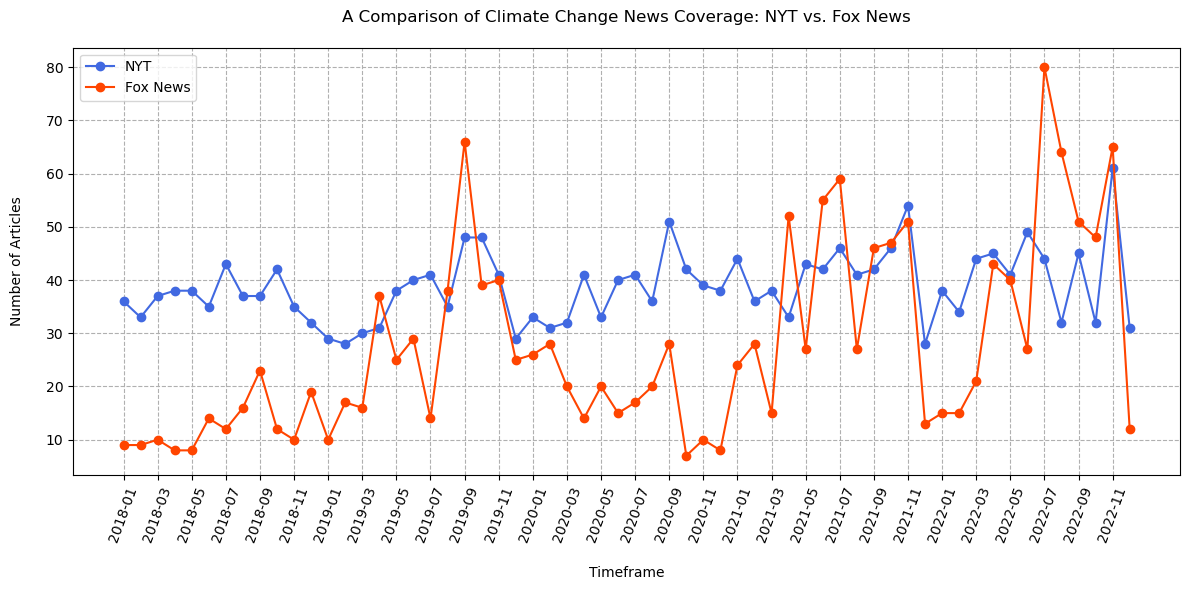

In [7]:
### Plot a line graph

plt.figure(figsize = (12, 6))

# Plot the number of NYT articles by month, with date on the x-axis, count on the y-axis
plt.plot(NYT_count['Date'],
         NYT_count['Articles'],
         label = 'NYT', marker = 'o', color = 'royalblue')

# Plot the number of Fox news articles
plt.plot(foxnews_count['Date'],
         foxnews_count['Articles'],
         label = 'Fox News', marker = 'o', color = 'orangered')

# Assign title and axes labels
plt.title('A Comparison of Climate Change News Coverage: NYT vs. Fox News\n')
plt.xlabel('\nTimeframe')
plt.ylabel('Number of Articles\n')


# Plot and store the current (monthly) x-ticks
plt.plot()
monthly_ticks = plt.xticks()[0]

# To avoid x-ticks being writen on top of one another,
# select tick labels for Jan/Mar/May/Jul/Sep/Nov of each year
bimonthly_ticks = monthly_ticks[::2]

# Apply the new x-tick labels
plt.xticks(bimonthly_ticks, rotation = 70)

# Add dashed lines for the grid. Add legend.
plt.grid(linestyle = '--')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.show()


### 4. Retrieve abstracts based on the month in which the articles were posted

##### To examine any patterns in climate change coverage during months for which there are unusual peaks/dips in the number of articles posted

In [8]:
### Create a dropdown menu based on the year & month of publication

def create_dropdown(dataframe):
    
    # Extract year-month as a string
    dataframe['year_month'] = dataframe['date'].dt.strftime('%Y-%m')

    ### Create a dropdown widget with unique year-months combination
    dropdown = widgets.Dropdown(
        options = sorted(dataframe['year_month'].unique()),
        description = 'Select Month:',
        disabled = False,
    )

    # Create a widget that displays all article abstracts of a given month
    output = widgets.Output(layout = {'height': '300px', 'overflow': 'scroll'})

    
    ### Upon selection of new date range, remove previous output and retrieve new output
    def refresh_upon_new_selection(change):
        if change['type'] == 'change' and change['name'] == 'value':
            with output:
                clear_output()
                selected_month = change['new']
                
                # Filter dataframe based on the selected month
                selected_data = dataframe[dataframe['year_month'] == selected_month]
                
                # Display all abstracts from the selected month
                for abstract in selected_data['abstract']:
                    # Separate each abstract with dashes, for readability
                    print(abstract)
                    print("---")

    dropdown.observe(refresh_upon_new_selection)

    # Display results
    display(dropdown, output)

#### [For NYT] Select month and year of interest:

In [9]:
create_dropdown(NYT)

Dropdown(description='Select Month:', options=('2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06…

Output(layout=Layout(height='300px', overflow='scroll'))

#### [For Fox News] Select month and year of interest:

In [10]:
create_dropdown(foxnews)

Dropdown(description='Select Month:', options=('2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06…

Output(layout=Layout(height='300px', overflow='scroll'))